In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer

In [49]:
data = pd.read_csv('data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Missing values

In [51]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

#### Dropping missing values

In [52]:
data_dropped = data.dropna(axis=0)

In [53]:
data_dropped.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Replacing missing values

In [54]:
data['culmen_length_mm'].fillna((data['culmen_length_mm'].mean()), inplace=True)
data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].median()), inplace=True)
data['flipper_length_mm'].fillna((data['flipper_length_mm'].mean()), inplace=True)
data['body_mass_g'].fillna((data['body_mass_g'].mean()), inplace=True)

data['sex'].fillna((data['sex'].value_counts().index[0]), inplace=True)

data.reset_index()
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE


In [55]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Inconsistencies

In [56]:
data["sex"].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [57]:
data = data[data["sex"] != "."].copy()

In [58]:
data["sex"].value_counts()

MALE      178
FEMALE    165
Name: sex, dtype: int64

## Categorical Encoding

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   343 non-null    float64
 3   culmen_depth_mm    343 non-null    float64
 4   flipper_length_mm  343 non-null    float64
 5   body_mass_g        343 non-null    float64
 6   sex                343 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [60]:
data["species"] = data["species"].astype('category')
data["island"] = data["island"].astype('category')
data["sex"] = data["sex"].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            343 non-null    category
 1   island             343 non-null    category
 2   culmen_length_mm   343 non-null    float64 
 3   culmen_depth_mm    343 non-null    float64 
 4   flipper_length_mm  343 non-null    float64 
 5   body_mass_g        343 non-null    float64 
 6   sex                343 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.8 KB


In [61]:
categorical_data = data.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g'], axis=1)
categorical_data.head()

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,MALE
4,Adelie,Torgersen,FEMALE


#### Label Encoder

In [62]:
categorical_data["species_cat"] = categorical_data["species"].cat.codes
categorical_data["island_cat"] = categorical_data["island"].cat.codes
categorical_data["sex_cat"] = categorical_data["sex"].cat.codes
categorical_data.head()

,species,island,sex,species_cat,island_cat,sex_cat
0,Adelie,Torgersen,MALE,0,2,1
1,Adelie,Torgersen,FEMALE,0,2,0
2,Adelie,Torgersen,FEMALE,0,2,0
3,Adelie,Torgersen,MALE,0,2,1
4,Adelie,Torgersen,FEMALE,0,2,0


In [63]:
categorical_data.drop(["species_cat", "island_cat", "sex_cat"], inplace=True, axis=1)

#### One-hot encoding

In [64]:
encoded_species = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])

categorical_data = categorical_data.join(encoded_species)
categorical_data = categorical_data.join(encoded_island)
categorical_data = categorical_data.join(encoded_sex)
categorical_data.head()

,species,island,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,FEMALE,MALE
0,Adelie,Torgersen,MALE,1,0,0,0,0,1,0,1
1,Adelie,Torgersen,FEMALE,1,0,0,0,0,1,1,0
2,Adelie,Torgersen,FEMALE,1,0,0,0,0,1,1,0
3,Adelie,Torgersen,MALE,1,0,0,0,0,1,0,1
4,Adelie,Torgersen,FEMALE,1,0,0,0,0,1,1,0


In [66]:
categorical_data.island.unique()

['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

#### Mean Encoding

In [68]:
city = ["Nairobi", "Nairobi", "Nairobi", "Nairobi", "Nairobi", "Lagos", "Lagos", "Lagos", "Lagos",]
label_enc = [1, 1, 1, 1, 1, 2, 2, 2, 2]
mean_enc = [0.4, 0.4, 0.4, 0.4, 0.4, 0.8, 0.8, 0.8, 0.8,]
target = [0, 1, 1, 0, 0, 1, 1, 1, 0]
sample_dt = pd.DataFrame({'feature': city, 'feature_label':label_enc, "mean_encoded":mean_enc, "target":target})
sample_dt

,feature,feature_label,mean_encoded,target
0,Nairobi,1,0.4,0
1,Nairobi,1,0.4,1
2,Nairobi,1,0.4,1
3,Nairobi,1,0.4,0
4,Nairobi,1,0.4,0
5,Lagos,2,0.8,1
6,Lagos,2,0.8,1
7,Lagos,2,0.8,1
8,Lagos,2,0.8,0


In [75]:
lg = sample_dt[sample_dt["feature"] == "Lagos"]

In [76]:
lg

,feature,feature_label,mean_encoded,target
5,Lagos,2,0.8,1
6,Lagos,2,0.8,1
7,Lagos,2,0.8,1
8,Lagos,2,0.8,0


In [77]:
3/4

0.75

## Outliers

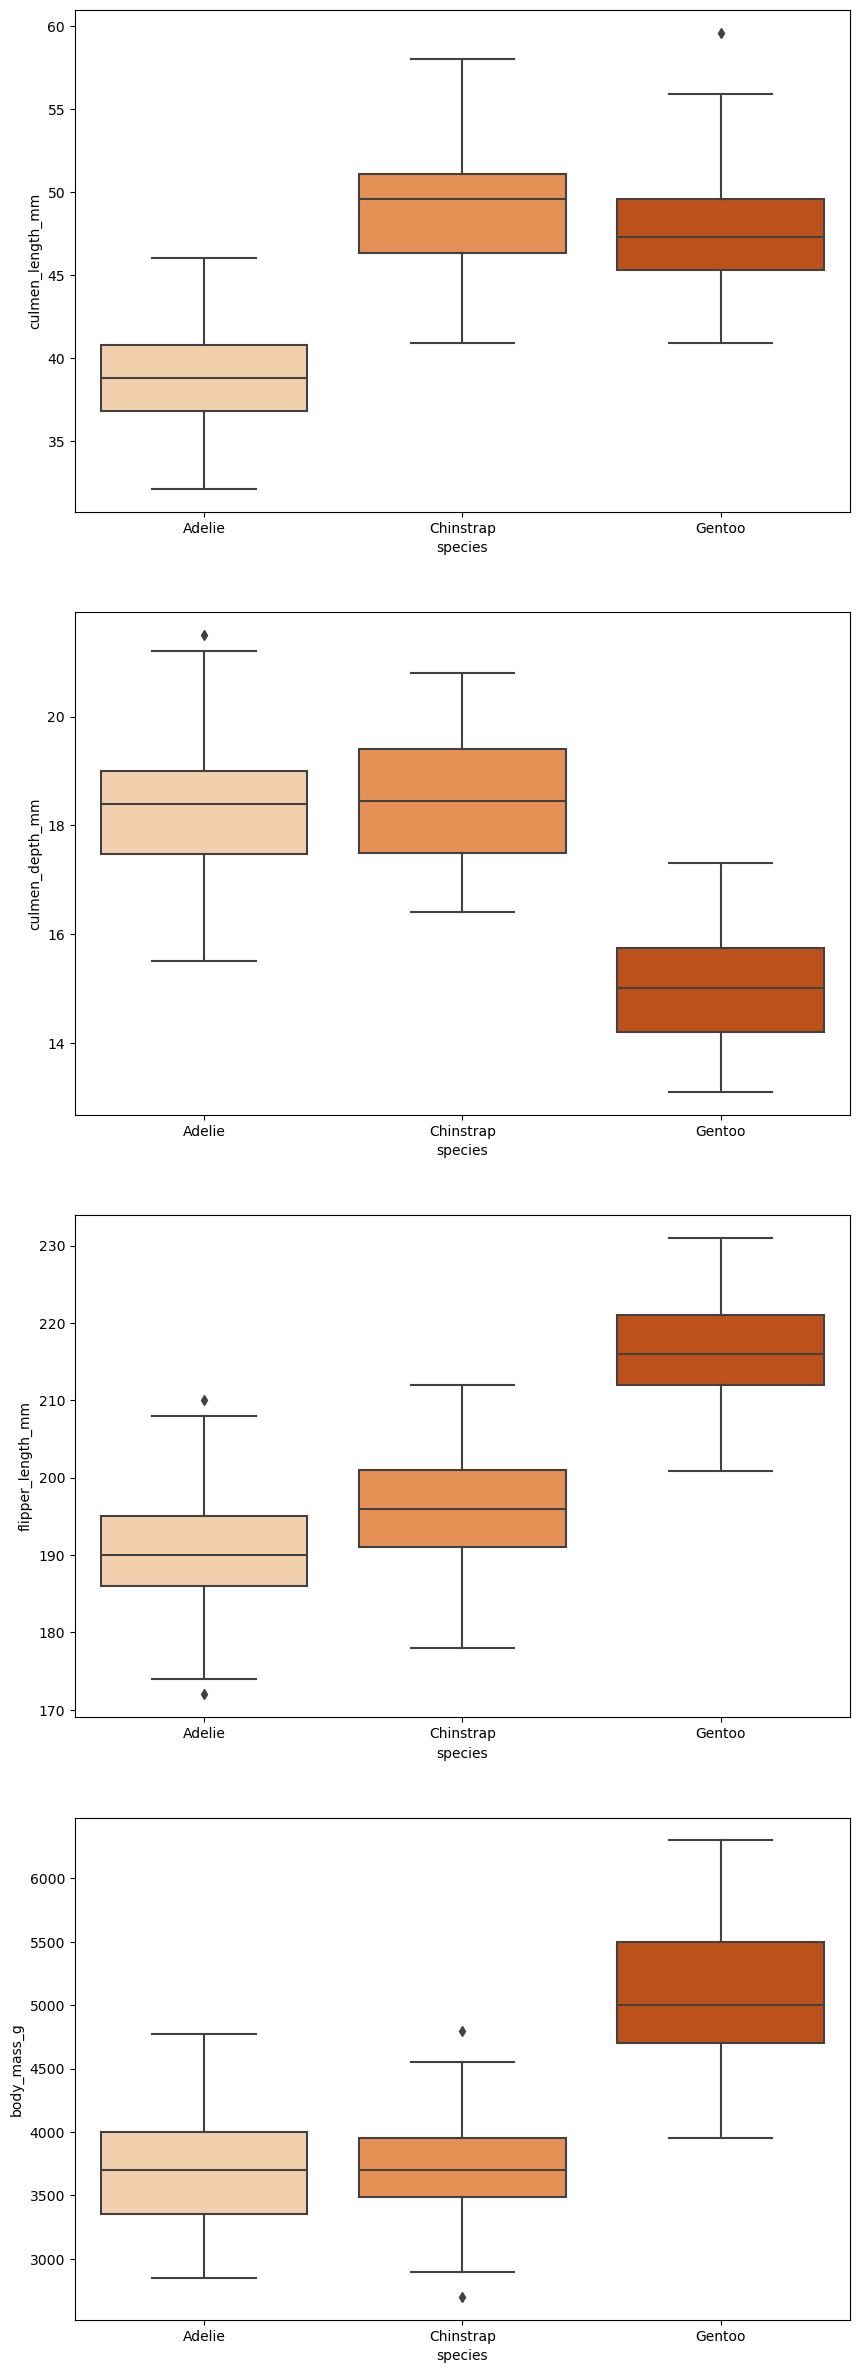

In [79]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sns.boxplot(data=data,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges")
sns.boxplot(data=data,y="culmen_depth_mm",x="species",orient="v",ax=axes[1], palette="Oranges")
sns.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[2], palette="Oranges")
sns.boxplot(data=data,y="body_mass_g",x="species",orient="v",ax=axes[3], palette="Oranges")
plt.show()

In [80]:
factor = 2
upper_lim = data['culmen_length_mm'].mean() + data['culmen_length_mm'].std() * factor
lower_lim = data['culmen_length_mm'].mean() - data['culmen_length_mm'].std() * factor

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.3,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.3,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.7,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.8,212.000000,5200.000000,FEMALE


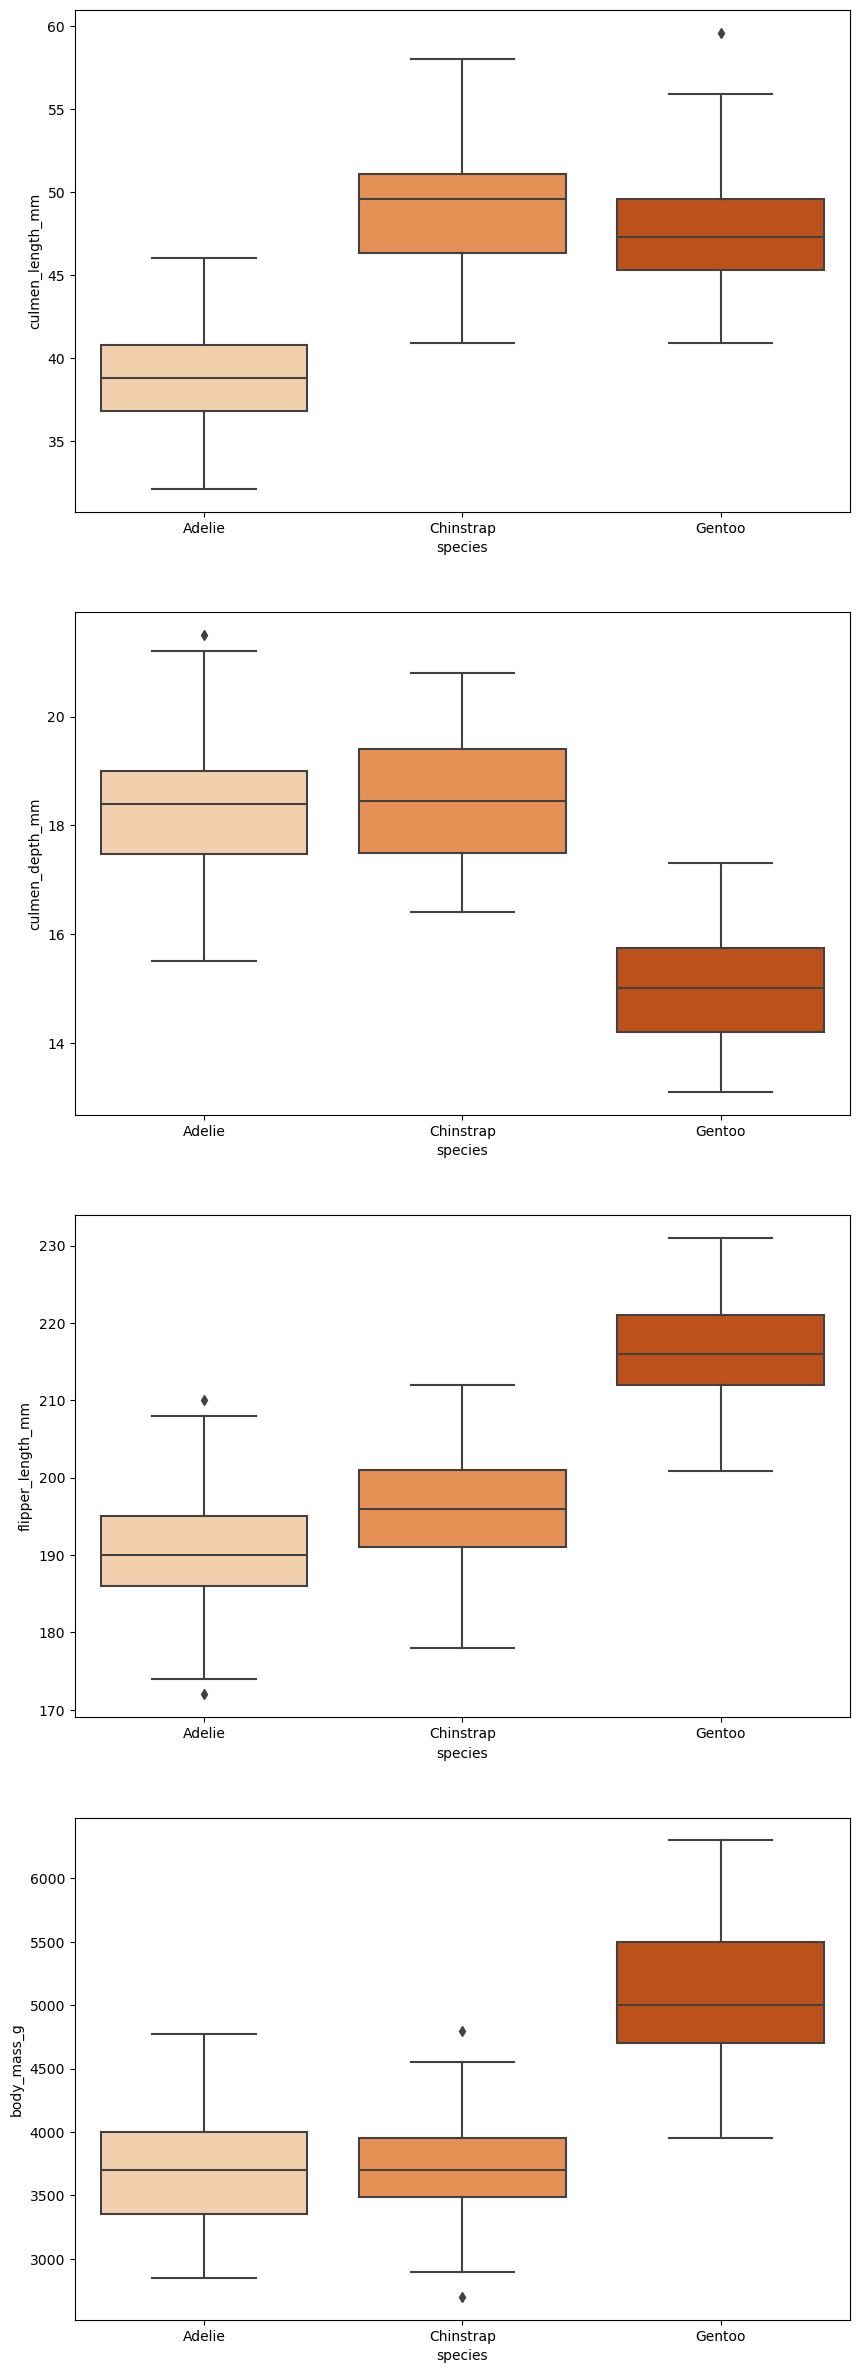

In [81]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sns.boxplot(data=data,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges")
sns.boxplot(data=data,y="culmen_depth_mm",x="species",orient="v",ax=axes[1], palette="Oranges")
sns.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[2], palette="Oranges")
sns.boxplot(data=data,y="body_mass_g",x="species",orient="v",ax=axes[3], palette="Oranges")
plt.show()

In [82]:
upper_lim = data['culmen_length_mm'].quantile(.95)
lower_lim = data['culmen_length_mm'].quantile(.05)

no_outliers = data[(data['culmen_length_mm'] < upper_lim) & (data['culmen_length_mm'] > lower_lim)]
no_outliers

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.4,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.0,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.3,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.3,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.3,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.3,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.7,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.8,212.000000,5200.000000,FEMALE


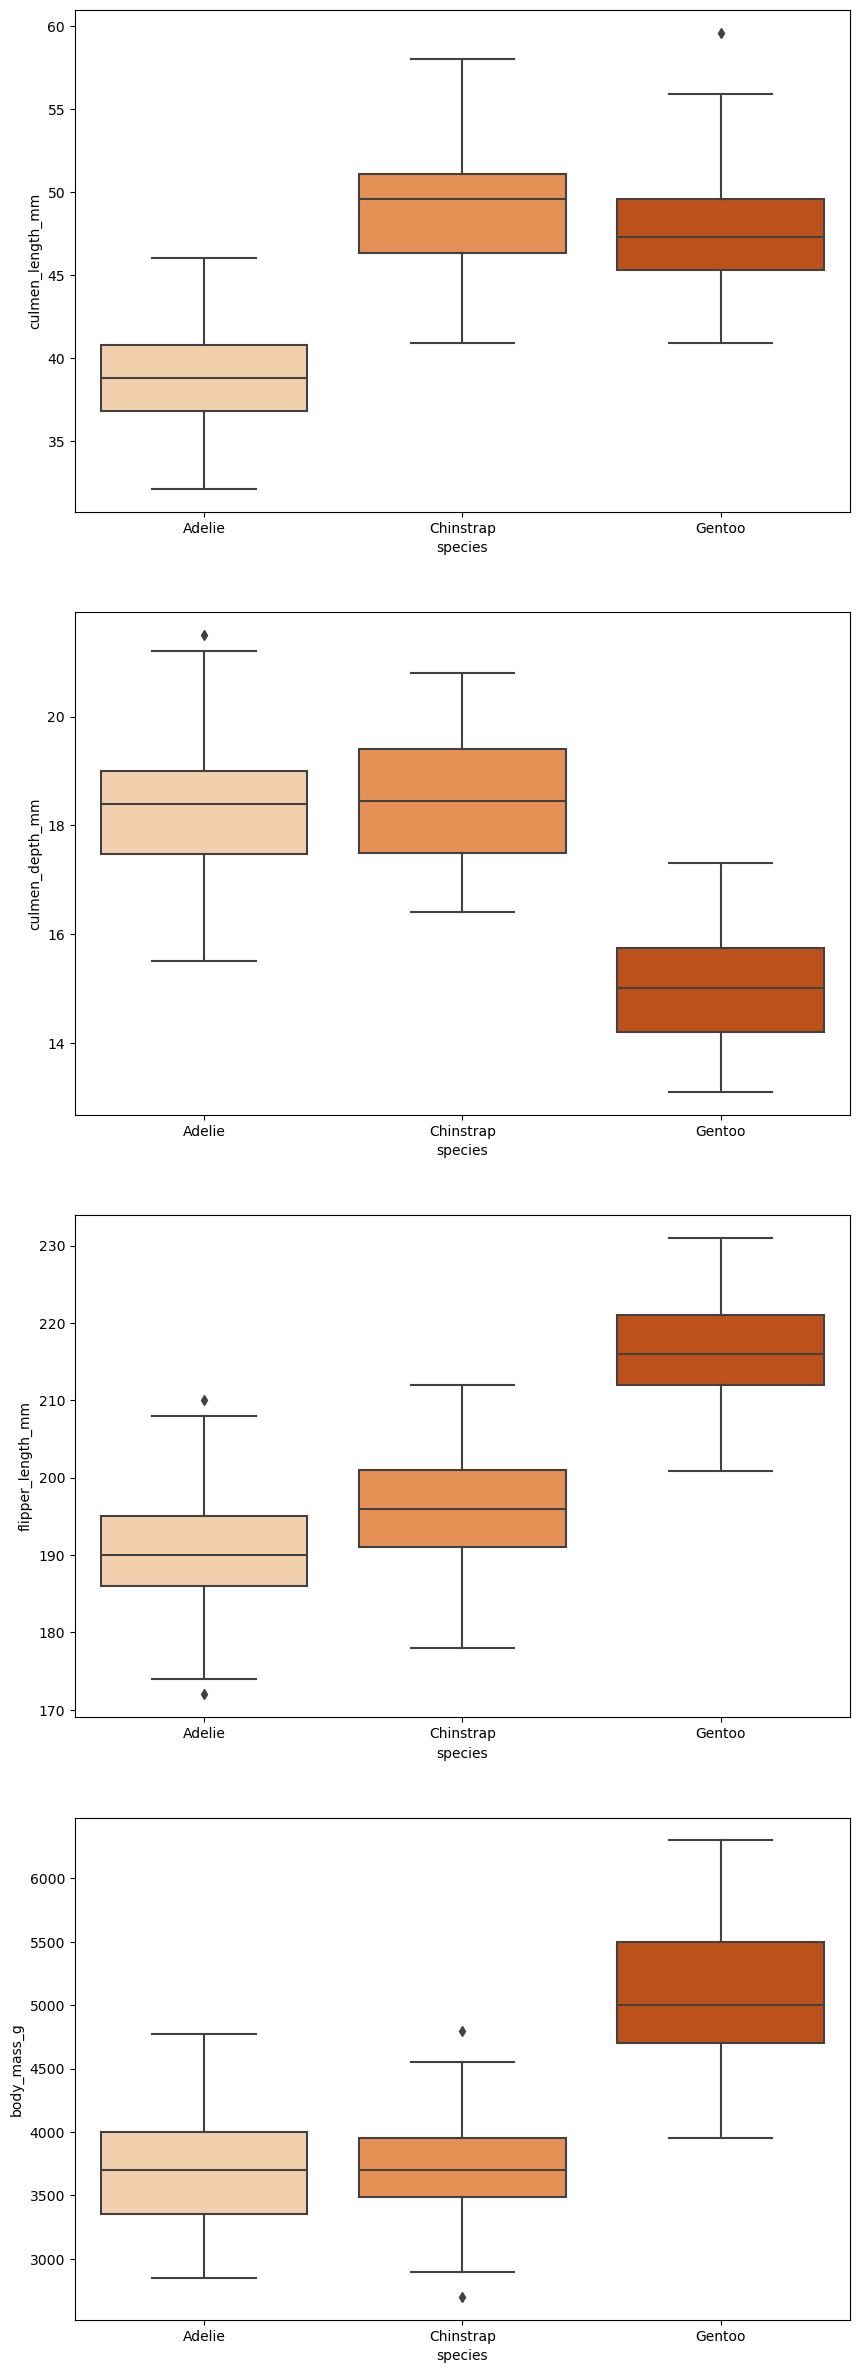

In [83]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
sns.boxplot(data=data,y="culmen_length_mm",x="species",orient="v",ax=axes[0], palette="Oranges")
sns.boxplot(data=data,y="culmen_depth_mm",x="species",orient="v",ax=axes[1], palette="Oranges")
sns.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[2], palette="Oranges")
sns.boxplot(data=data,y="body_mass_g",x="species",orient="v",ax=axes[3], palette="Oranges")
plt.show()

## Discretization

In [87]:
bin_data = data[['culmen_length_mm']].copy()
bin_data['culmen_length_bin'] = pd.qcut(data['culmen_length_mm'], q=[0, 0.33, 0.66, 1],
                                       labels=["Low", "Mid", "High"])
bin_data

,culmen_length_mm,culmen_length_bin
0,39.10000,Low
1,39.50000,Low
2,40.30000,Low
3,43.92193,Mid
4,36.70000,Low
...,...,...
339,43.92193,Mid
340,46.80000,High
341,50.40000,High
342,45.20000,Mid


#### Standard Scaler

In [89]:
scaled_data = data[['body_mass_g']]

print('Mean:', scaled_data['body_mass_g'].mean())
print('Standard Deviation:', scaled_data['body_mass_g'].std())

Mean: 4199.791570763644
Standard Deviation: 799.9508688401579


In [90]:
standard_scaler = StandardScaler()
scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_scaled'].std())
scaled_data['body_mass_scaled']

Mean: -1.6313481178165566e-16
Standard Deviation: 1.0014609211587777


C:\Users\user\AppData\Local\Temp\ipykernel_10620\1317248497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])


0     -0.563095
1     -0.500500
2     -1.189047
3      0.002457
4     -0.938666
         ...   
339    0.002457
340    0.813998
341    1.940711
342    1.252164
343    1.502545
Name: body_mass_scaled, Length: 343, dtype: float64

#### MinMax Scaler

In [92]:
minmax_scaler = MinMaxScaler()
scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']].copy())

print('Mean:', scaled_data['body_mass_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_min_max_scaled'].std())

Mean: 0.4166087696565679
Standard Deviation: 0.2222085746778217


C:\Users\user\AppData\Local\Temp\ipykernel_10620\2859838112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']].copy())
